In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
simple = pd.read_csv(os.path.join(os.getcwd(), 'FFChallenge_v5', 'example_prepared_data.csv'))

In [2]:
train = simple[simple['set']=='train']

In [3]:
test = pd.read_csv(os.path.join(os.getcwd(),'ffchallenge_papers_replication_materials', 'test.csv'))
test = test[test['gpa'].notnull()]
test = pd.merge(test, simple.drop(['grit', 'gpa', 'materialHardship',
                                  'eviction','layoff','jobTraining'], axis=1), how='left',
                left_on='challengeID', right_on='challengeID')

In [4]:
train_for_gpa_uni = train[train['gpa'].notnull() &
                          train['gpa_related_lag_teacher_rating'].notnull()# &
#                          train['cm1edu'].notnull() &
#                          train['cm1ethrace'].notnull()
                         ].copy()
train_for_gpa_uni.at[:, 'constant'] = 1
test.loc[:, 'constant'] = 1
olsmod = sm.OLS(train_for_gpa_uni['gpa'], train_for_gpa_uni[['constant', 'gpa_related_lag_teacher_rating']])
olsres = olsmod.fit()
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.12e-27
Time:                        18:58:56   Log-Likelihood:                -1118.3
No. Observations:                1165   AIC:                             2241.
Df Residuals:                    1163   BIC:                             2251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           2.1832      0.064     34.202      0.000       2.058       2.308
gpa_related_lag_teacher_rating     0.2343      0.021     11.190      0.000       0.193       0.275
==============================================================================
Omnibus:                       23.130   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.865
Skew:                          -0.274   Prob(JB):                     2.95e-05
Kurtosis:                       2.641   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='gpa_uni_pred', ylabel='gpa'>

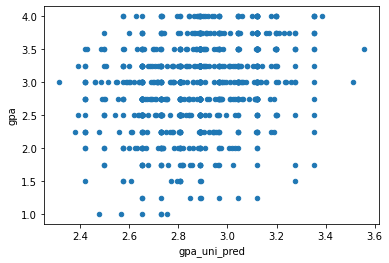

In [5]:
test['gpa_uni_pred'] = olsres.predict(test[['constant', 'gpa_related_lag_teacher_rating']])
test[['gpa_uni_pred', 'gpa']].plot(x='gpa_uni_pred', y='gpa', kind='scatter')

In [6]:
test['gpa_uni_pred_sqr_error'] = (test['gpa'] - test['gpa_uni_pred'])**2
sum_gpa_uni_pred_sqr_error = test['gpa_uni_pred_sqr_error'].sum()
test['gpa_uni_dev_sqr'] = (test['gpa']-train_for_gpa_uni['gpa'].mean())**2
gpa_uni_sum_deviance_sqr = test['gpa_uni_dev_sqr'].sum()
R2_gpa_uni_holdout = 1 -(sum_gpa_uni_pred_sqr_error/gpa_uni_sum_deviance_sqr)

In [7]:
R2_gpa_uni_holdout

0.07248716886869355

In [8]:
train_for_gpa_uni = pd.concat((train_for_gpa_uni, pd.get_dummies(train_for_gpa_uni['cm1ethrace'], drop_first=True)), axis=1)
train_for_gpa_uni = pd.concat((train_for_gpa_uni, pd.get_dummies(train_for_gpa_uni['cm1edu'], drop_first=True)), axis=1)
train_for_gpa_uni = pd.concat((train_for_gpa_uni, pd.get_dummies(train_for_gpa_uni['cm1relf'], drop_first=True)), axis=1)

test = pd.concat((test, pd.get_dummies(test['cm1ethrace'], drop_first=True)), axis=1)
test = pd.concat((test, pd.get_dummies(test['cm1edu'], drop_first=True)), axis=1)
test = pd.concat((test, pd.get_dummies(test['cm1relf'], drop_first=True)), axis=1)

olsmod = sm.OLS(train_for_gpa_uni['gpa'], train_for_gpa_uni[['constant', 'gpa_related_lag_teacher_rating',
                                                             'hispanic', 'other','white, non-hispanic',
                                                             'hs or equiv', 'less hs', 'some coll, tech',
                                                             'married', 'other']])
olsres = olsmod.fit()
test['gpa_uni_pred'] = olsres.predict(test[['constant', 'gpa_related_lag_teacher_rating',
                                            'hispanic', 'other','white, non-hispanic',
                                            'hs or equiv', 'less hs', 'some coll, tech',
                                            'married', 'other']])
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     25.50
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.74e-40
Time:                        18:58:56   Log-Likelihood:                -1072.3
No. Observations:                1165   AIC:                             2165.
Df Residuals:                    1155   BIC:                             2215.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           2.5511      0.100     25.495      0.000       2.355       2.747
gpa_related_lag_teacher_rating     0.1796      0.021      8.465      0.000       0.138       0.221
hispanic                           0.1289      0.046      2.790      0.005       0.038       0.220
other                              0.1548      0.054      2.847      0.004       0.048       0.261
other                             -0.0161      0.021     -0.762      0.446      -0.057       0.025
white, non-hispanic                0.1187      0.051      2.346      0.019       0.019       0.218
hs or equiv                       -0.2664      0.071     -3.755      0.000      -0.406      -0.127
less hs                           -0.4336      0.073     -5.916      0.000      -0.577      -0.290
some coll, tech                   -0.1906      0.070     -2.730      0.006      -0.328      -0.054
married                            0.0375      0.054      0.695      0.487      -0.068       0.144
other                              0.1548      0.054      2.847      0.004       0.048       0.261
other                             -0.0161      0.021     -0.762      0.446      -0.057       0.025
==============================================================================
Omnibus:                       20.210   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.717
Skew:                          -0.313   Prob(JB):                     3.17e-05
Kurtosis:                       2.812   Cond. No.                     1.65e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
test['gpa_uni_pred_sqr_error'] = (test['gpa'] - test['gpa_uni_pred'])**2
sum_gpa_uni_pred_sqr_error = test['gpa_uni_pred_sqr_error'].sum()
test['gpa_uni_dev_sqr'] = (test['gpa']-train_for_gpa_uni['gpa'].mean())**2
gpa_uni_sum_deviance_sqr = test['gpa_uni_dev_sqr'].sum()
R2_gpa_uni_holdout = 1 -(sum_gpa_uni_pred_sqr_error/gpa_uni_sum_deviance_sqr)

In [10]:
R2_gpa_uni_holdout

0.13238151396802778

In [13]:
np.nanmean([np.nan, 3,2])

2.5